In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [11]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

In [12]:
from clustering import apply_kmeans, plot_clusters, apply_dbscan, plot_dbscan, save_kmeans_plot, save_dbscan_plot


In [13]:
data_path = '../data/raw/iris.csv'
df = pd.read_csv(data_path)
features = df.drop(columns=['species'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(features)

In [14]:
km, y_km = apply_kmeans(df_scaled, n_clusters=3)


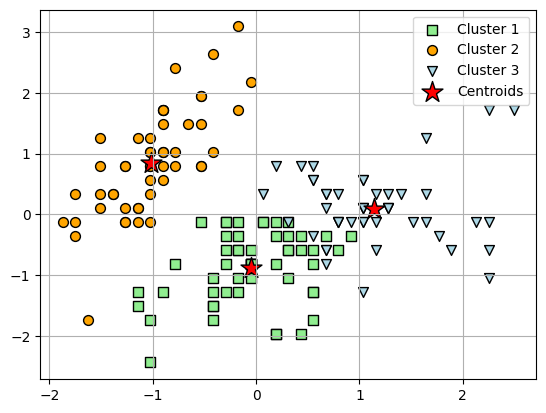

In [15]:
fig_kmeans = plot_clusters(df_scaled, y_km, km)
save_kmeans_plot(fig_kmeans, 'kmeans_clusters.png')

In [16]:
silhouette_avg_kmeans = silhouette_score(df_scaled, y_km)
print(f'Silhouette Score for K-Means: {silhouette_avg_kmeans}')

Silhouette Score for K-Means: 0.45994823920518646


In [17]:
db, y_db = apply_dbscan(df_scaled, eps=0.2, min_samples=5)


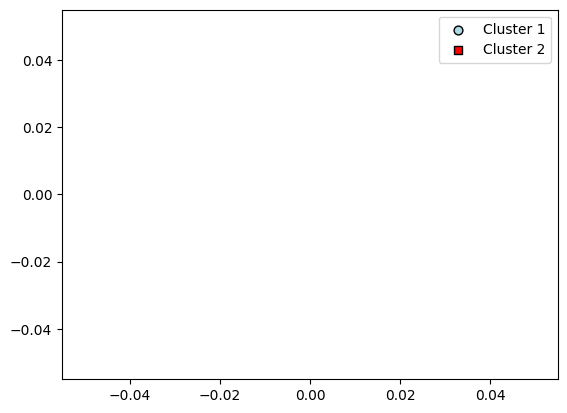

In [18]:
fig_dbscan = plot_dbscan(df_scaled, y_db)
save_dbscan_plot(fig_dbscan, 'dbscan_clusters.png')

In [19]:
if len(set(y_db)) > 1:
    silhouette_avg_dbscan = silhouette_score(df_scaled, y_db)
    print(f'Silhouette Score for DBSCAN: {silhouette_avg_dbscan}')
else:
    print('DBSCAN no encontró suficientes clusters distintos para calcular el silhouette score')

DBSCAN no encontró suficientes clusters distintos para calcular el silhouette score
